In [ ]:
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving diabetes dataset.csv to diabetes dataset.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['diabetes dataset.csv']))
print(df)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [ ]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

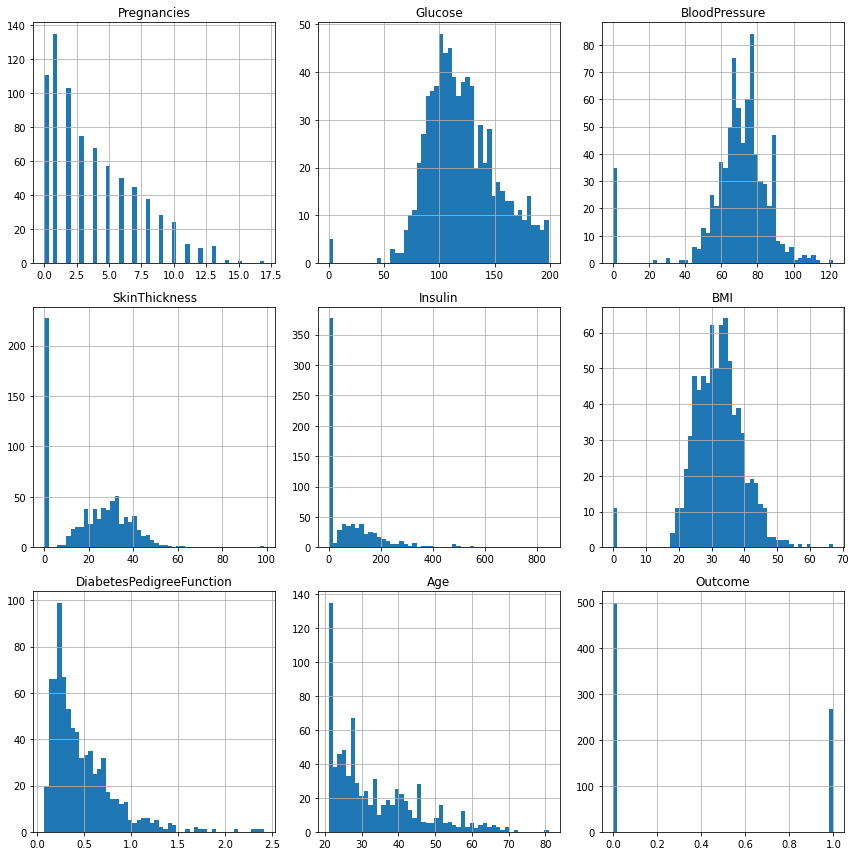

In [ ]:
df.hist(figsize=(12,12),bins=50)
plt.tight_layout()

In [ ]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
 # make age category column which will help in filling values which are 0
df['age_category'] = pd.cut(df['Age'], bins=[0, 21, 31, 41, 51, 61, 71, 81, np.inf], labels=[1,2,3,4,5,6,7,8])
df['age_category'] = df['age_category'].astype(int)

In [ ]:
# Fill insulin column with respect to age category
agecat = [1,2,3,4,5,6,7,8]

for agec in agecat:
  df['Insulin'].replace(0, round(df[df['age_category'] == agec]['Insulin'].mean(), 0), inplace=True)

In [ ]:
# Fill rest with same strategy
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
for feature in features:
  for agec in agecat:
    if df[feature].dtype == 'float64':
      df[feature].replace(0, round(df[df['age_category'] == agec][feature].mean(), 1), inplace=True)
    else:
      df[feature].replace(0, round(df[df['age_category'] == agec][feature].mean(), 0), inplace=True)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_category
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.597656,72.113281,26.152344,115.835938,32.390755,0.471876,33.240885,0.348958,2.697917
std,3.369578,30.455873,12.169980,9.938479,94.298227,6.897416,0.331329,11.760232,0.476951,1.192062
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,1.000000
25%,1.000000,99.750000,64.000000,19.000000,74.000000,27.500000,0.243750,24.000000,0.000000,2.000000
50%,3.000000,117.000000,72.000000,23.000000,74.000000,32.000000,0.372500,29.000000,0.000000,2.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,3.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,7.000000


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
age_category                0
dtype: int64

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
age_category                0
dtype: int64

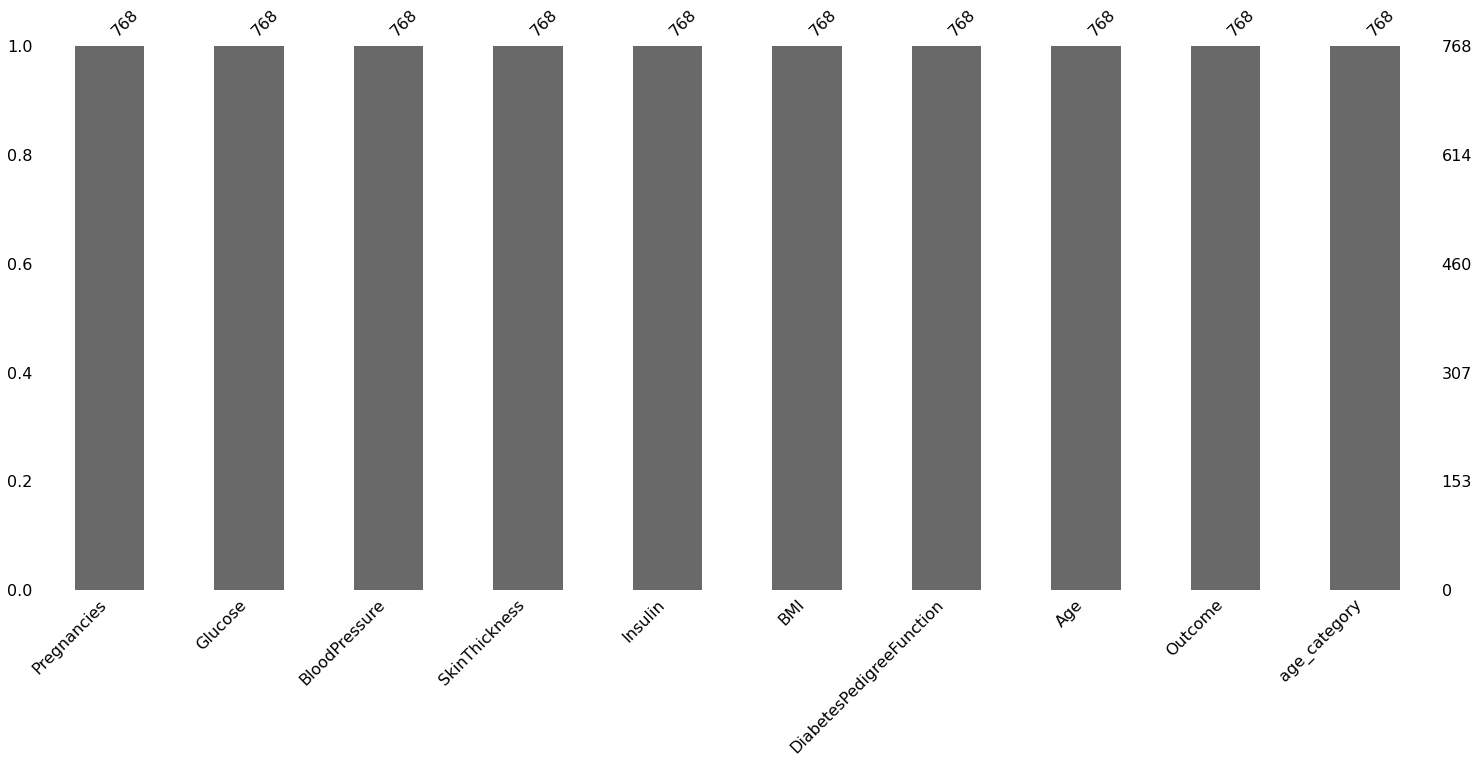

In [ ]:
import missingno as msno
p=msno.bar(df)

In [ ]:
df.replace(to_replace=["?", ";"], value=np.nan)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_category
0,6,148,72,35,74,33.6,0.627,50,1,4
1,1,85,66,29,74,26.6,0.351,31,0,2
2,8,183,64,19,74,23.3,0.672,32,1,3
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,3
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,6
764,2,122,70,27,74,36.8,0.340,27,0,2
765,5,121,72,23,112,26.2,0.245,30,0,2
766,1,126,60,19,74,30.1,0.349,47,1,4


In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.fillna(df.mean(), inplace=True)
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35       74  33.6   
1              1       85             66             29       74  26.6   
2              8      183             64             19       74  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27       74  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60             19       74  30.1   
767            1       93             70             31       74  30.4   

     DiabetesPedigreeFunction  Age  Outcome  age_category  
0                       0.627   50        1        